In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AkarshVyas/Machine-Learning-Part-1/refs/heads/main/heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [14]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

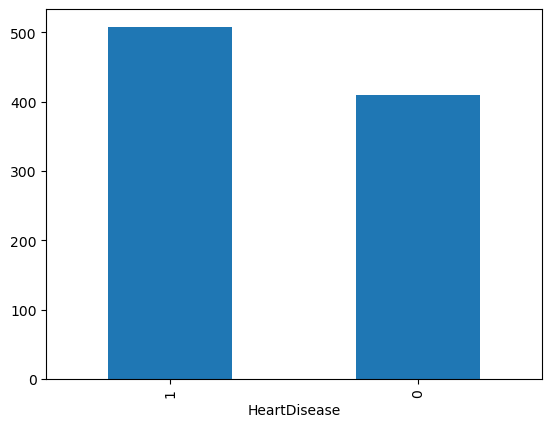

In [16]:
df["HeartDisease"].value_counts().plot(kind = "bar")

In [17]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [22]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)
    plt.tight_layout()

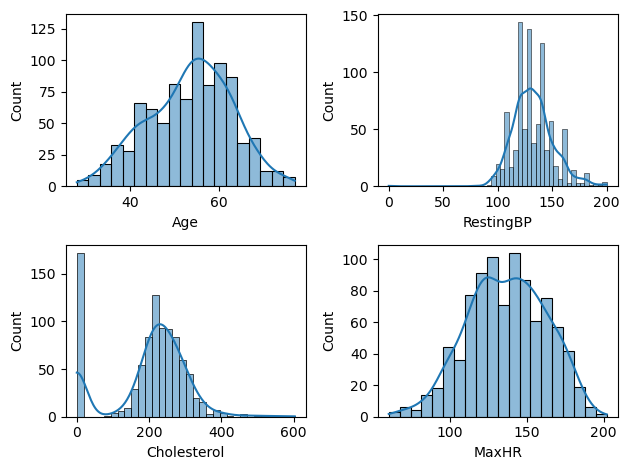

In [23]:
plotting("Age",1)
plotting("RestingBP",2)
plotting("Cholesterol",3)
plotting("MaxHR",4)

In [24]:
df["Cholesterol"].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [26]:
ch_mean = df.loc[df["Cholesterol"] != 0, 'Cholesterol'].mean()

In [27]:
df["Cholesterol"] = df["Cholesterol"].replace(0,ch_mean)

In [28]:
df["Cholesterol"].value_counts()

Cholesterol
244.635389    172
254.000000     11
220.000000     10
223.000000     10
204.000000      9
             ... 
353.000000      1
278.000000      1
157.000000      1
176.000000      1
131.000000      1
Name: count, Length: 222, dtype: int64

In [29]:
ch_mean = df.loc[df["RestingBP"] != 0, 'RestingBP'].mean()
df["RestingBP"] = df["RestingBP"].replace(0,ch_mean).round(2)

In [31]:
df["RestingBP"].value_counts()

RestingBP
120.0    132
130.0    118
140.0    107
110.0     58
150.0     55
        ... 
101.0      1
117.0      1
192.0      1
129.0      1
164.0      1
Name: count, Length: 67, dtype: int64

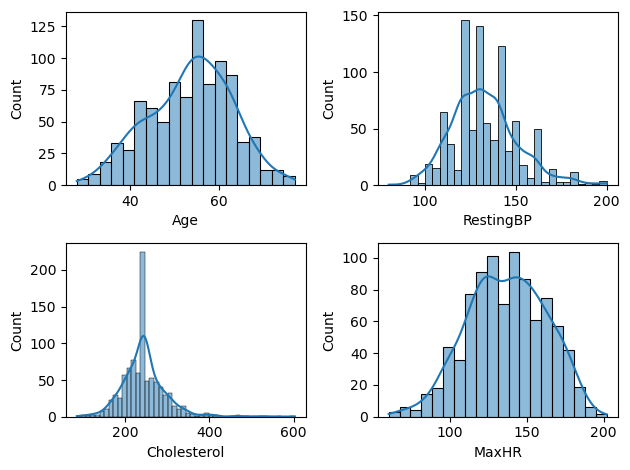

In [32]:
plotting("Age",1)
plotting("RestingBP",2)
plotting("Cholesterol",3)
plotting("MaxHR",4)

<Axes: xlabel='Sex', ylabel='count'>

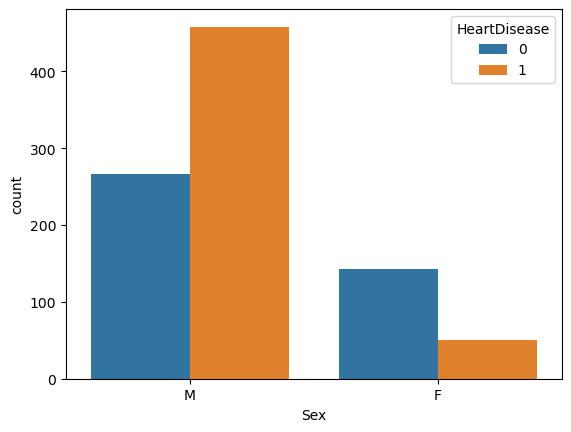

In [36]:
sns.countplot(x = df["Sex"], hue =df["HeartDisease"])

<Axes: xlabel='ChestPainType', ylabel='count'>

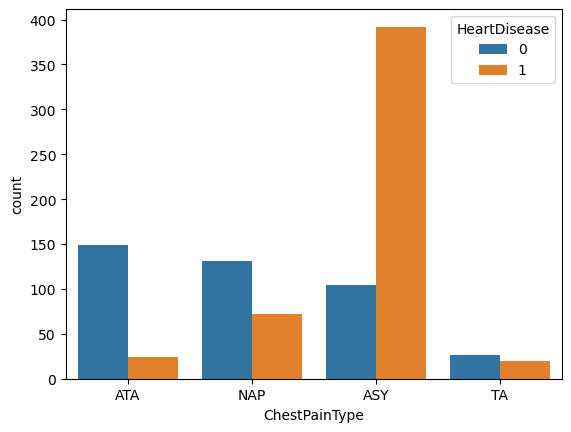

In [37]:
sns.countplot(x= "ChestPainType" , hue = "HeartDisease" , data = df)

<Axes: xlabel='FastingBS', ylabel='count'>

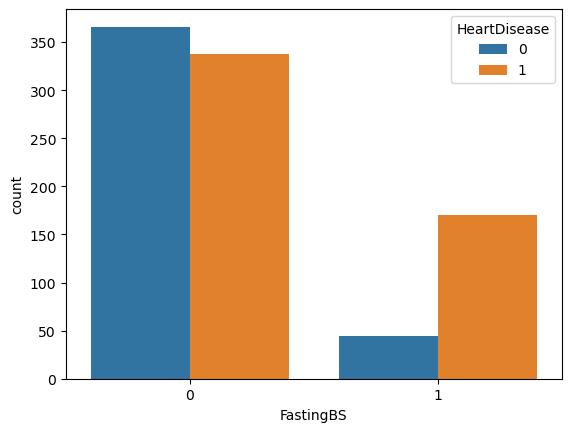

In [39]:
sns.countplot(x= "FastingBS" , hue = "HeartDisease" , data = df)

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

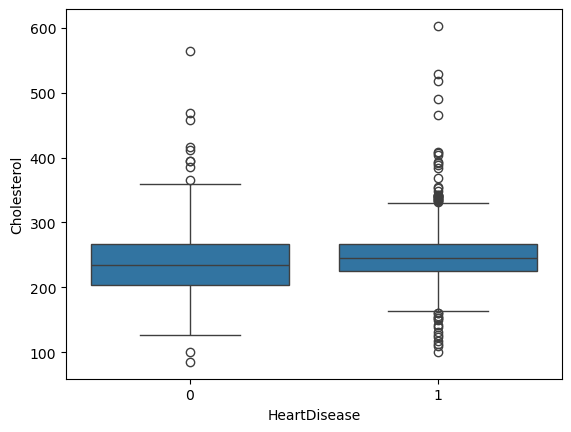

In [40]:
sns.boxplot(x="HeartDisease" , y= "Cholesterol" ,data =df)


<Axes: xlabel='HeartDisease', ylabel='Age'>

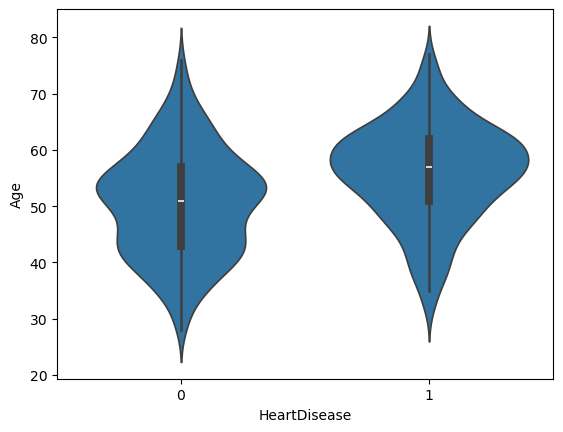

In [42]:
sns.violinplot(x="HeartDisease" , y= "Age" ,data =df)

<Axes: >

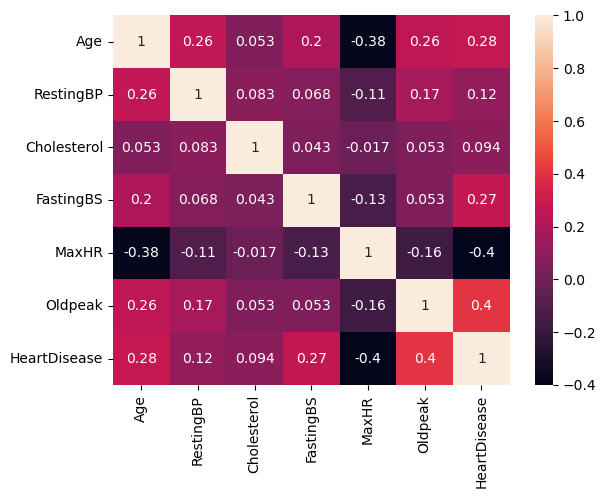

In [43]:
sns.heatmap(df.corr(numeric_only = True) ,annot =True)

In [44]:
## data preprocessing

In [45]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [47]:
df_encode = pd.get_dummies(df)

In [50]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138.0,214.0,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150.0,195.0,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130.0,236.0,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


In [58]:
df_encode=df_encode.astype(int)

In [61]:
from sklearn.preprocessing import StandardScaler
cols = ["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]
scaler = StandardScaler()

df_encode[cols] = scaler.fit_transform(df_encode[cols])

In [62]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.398662,-0.039684,-0.069751,0,1.535481,-0.727592,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,0.045626,1.417516,-1.432128,0,0.016546,0.282891,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,-1.398662,-0.039684,-0.069751,0,-1.502389,-0.727592,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,0.045626,-0.039684,-0.069751,0,-1.502389,0.282891,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.045626,-0.039684,-0.069751,0,0.016546,-0.727592,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.045626,-1.496884,-0.069751,0,0.016546,0.282891,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,1.489913,-0.039684,-0.069751,1,0.016546,2.303858,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,0.045626,-0.039684,-2.794504,0,0.016546,0.282891,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,0.045626,-0.039684,-0.069751,0,1.535481,-0.727592,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [65]:
from scipy.stats import pearsonr
selected_features = [
    'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
        'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'
       ]
correlations = {
    feature: pearsonr(df_encode[feature],df_encode['HeartDisease'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()),columns = ["feature","pearson correlation"])
correlation_df.sort_values(by="pearson correlation", ascending =False)

,feature,pearson correlation
18,ST_Slope_Flat,0.554134
8,ChestPainType_ASY,0.516716
16,ExerciseAngina_Y,0.494282
5,Oldpeak,0.392385
7,Sex_M,0.305445
3,FastingBS,0.267291
0,Age,0.231173
17,ST_Slope_Down,0.122527
14,RestingECG_ST,0.102527
1,RestingBP,0.089932


In [63]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')